In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')

In [3]:
# 28*28 image => 784
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
print(fashion_test_df.shape)

(10000, 785)


In [6]:
training = np.array(fashion_train_df, dtype = 'float32')

In [7]:
testing = np.array(fashion_test_df, dtype = 'float32')

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
training.shape

(60000, 785)

In [10]:
i = random.randint(1, 60000)

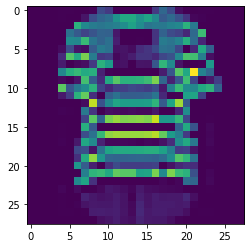

In [11]:
plt.imshow(training[i, 1:].reshape(28, 28))

# The 10 classes decoding is as follows:
#### 0 => T-shirt/top
#### 1 => Trouser
#### 2 => Pullover
#### 3 => Dress
#### 4 => Coat
#### 5 => Sandal
#### 6 => Shirt
#### 7 => Sneaker
#### 8 => Bag
#### 9 => Ankle boot

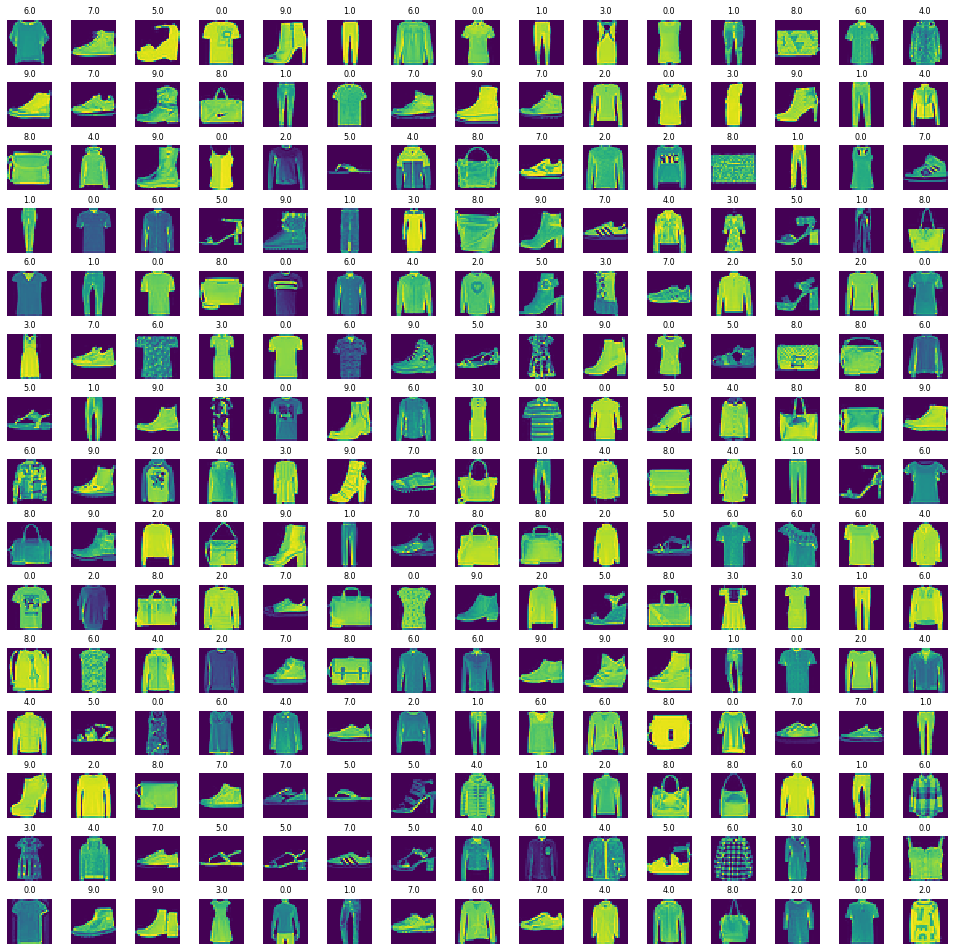

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))

axes = axes.ravel() # flatten the 15*15 matrix into 225 array

n_training = len(training)

for i in np.arange(W_grid*L_grid):
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Training the Model

In [13]:
X_train = training[:, 1:]/255

In [14]:
y_train = training[:, 0]

In [15]:
X_test = testing[:, 1:]/255

In [16]:
y_test = testing[:, 0]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [19]:
X_train.shape

(48000, 784)

In [20]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [21]:
X_train.shape

(48000, 28, 28, 1)

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
X_validate.shape

(12000, 28, 28, 1)

In [24]:
import keras

Using TensorFlow backend.


In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
from tensorflow.keras.callbacks import TensorBoard

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [31]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(units = 32, activation = 'relu'))

In [34]:
model.add(Dense(units = 10, activation = 'sigmoid'))

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [36]:
 epochs = 10

In [37]:
model.fit(X_train, y_train, batch_size=512, epochs = epochs, verbose=1, validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 216us/sample - loss: 1.5226 - accuracy: 0.5490 - val_loss: 0.8152 - val_accuracy: 0.7084
Epoch 2/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.7283 - accuracy: 0.7370 - val_loss: 0.6692 - val_accuracy: 0.7559
Epoch 3/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.6338 - accuracy: 0.7696 - val_loss: 0.6170 - val_accuracy: 0.7700
Epoch 4/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.5857 - accuracy: 0.7885 - val_loss: 0.5732 - val_accuracy: 0.7933
Epoch 5/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.5550 - accuracy: 0.7997 - val_loss: 0.5453 - val_accuracy: 0.8056
Epoch 6/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.5297 - accuracy: 0.8097 - val_loss: 0.5216 - val_accuracy: 0.8143
Epoch 7/10
48000/48000 [==============================

# Evaluating the Model

In [44]:
evaluation = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.828


In [46]:
predicted_classes = model.predict_classes(X_test)

In [47]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [49]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

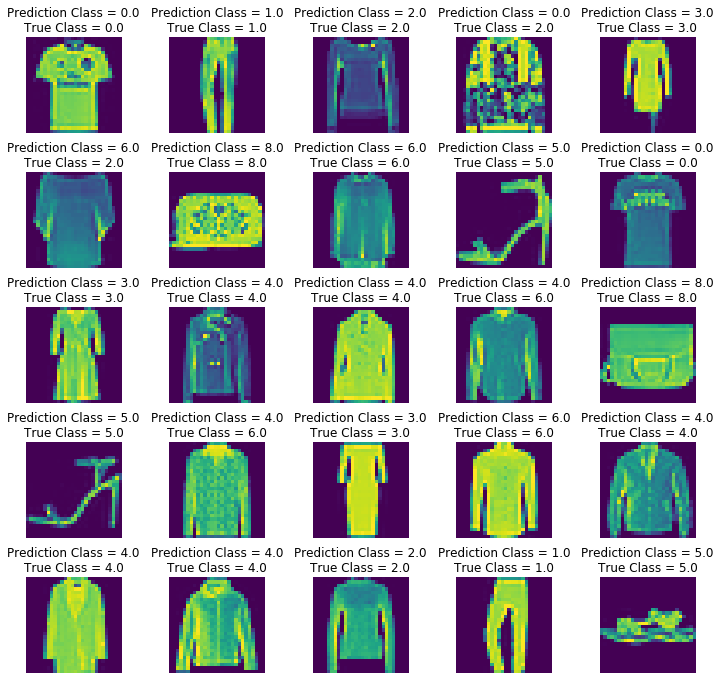

In [48]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\nTrue Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
cm = confusion_matrix(y_test, predicted_classes)

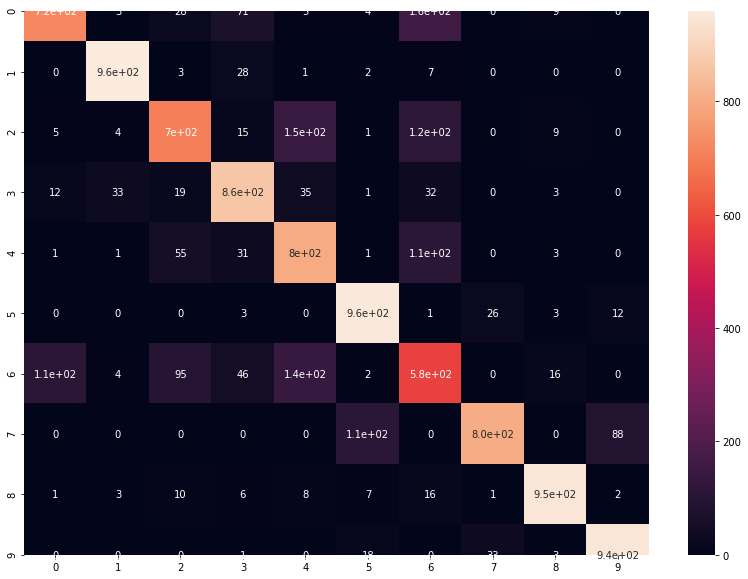

In [52]:
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [54]:
num_classes = 10
target_names = ["class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.72      0.78      1000
     class 1       0.95      0.96      0.96      1000
     class 2       0.77      0.70      0.74      1000
     class 3       0.81      0.86      0.84      1000
     class 4       0.70      0.80      0.75      1000
     class 5       0.87      0.95      0.91      1000
     class 6       0.57      0.58      0.58      1000
     class 7       0.93      0.81      0.86      1000
     class 8       0.95      0.95      0.95      1000
     class 9       0.90      0.94      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

